In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#  Cargamos el fichero a trabajar
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [4]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [11]:
# Variable magica para que todos los graficos queden alineados
%matplotlib inline

In [12]:
# Se puede usar para indicar donde guardar las imagenes
#savefig("path_donde_guardar_im.jpeg")

### Scatter Plot

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

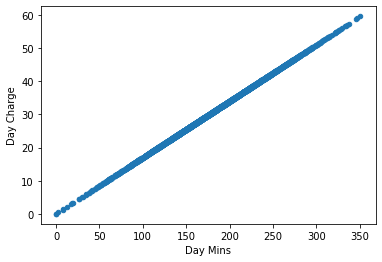

In [15]:
# Diagrama de dispersión que ve la relación entre 2 variables
# En este caso mientras mas carga mas son llamadas diarias
data.plot.scatter(x="Day Mins", y="Day Charge")

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

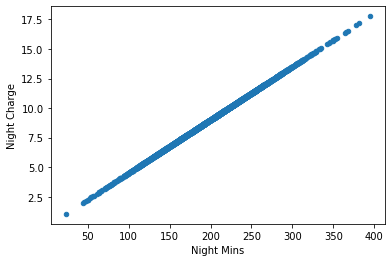

In [18]:
# Relación líneal que indica que mientras mas carga más 
# llamadas nocturnas
data.plot.scatter(x="Night Mins", y="Night Charge")

In [ ]:
# Generamos un panel para representar multiples gráficos